<h1>Импорт библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [ ]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    sum = np.zeros((X[0].shape[0], 1))  # Инициализируем суммарный вектор нулями (размерность (n, 1))
    for matrix, vector in zip(X, V):
        sum += np.dot(matrix, vector)  # Увеличиваем сумму на произведение матрицы и вектора
    return sum

# Тесты
X1 = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
V1 = [np.array([[1], [1]]), np.array([[1], [1]])]
print(sum_prod(X1, V1), "[[14], [22]]")

X2 = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
V2 = [np.array([[0], [0]]), np.array([[0], [0]])]
print(sum_prod(X2, V2), "[[0], [0]]")

X3 = [np.eye(2), np.eye(2)]
V3 = [np.array([[1], [1]]), np.array([[2], [2]])]
print(sum_prod(X3, V3), "[[3], [3]]")

X4 = [np.array([[1, 0], [0, 1]])]
V4 = [np.array([[1], [2]])]
print(sum_prod(X4, V4), "[[1], [2]]")

[[14.]
 [22.]] [[14], [22]]
[[0.]
 [0.]] [[0], [0]]
[[3.]
 [3.]] [[3], [3]]
[[1.]
 [2.]] [[1], [2]]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [ ]:
def binarize(M, threshold):
    return(M > threshold).astype(int)

M1 = np.array([[0.5, 1.2], [2.3, 0.7]])
threshold1 = 0.5
print(binarize(M1, threshold1))

[[0 1]
 [1 1]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [ ]:
from collections import Counter

def unique_rows(mat):
    urows = []
    for i in mat:
        k = Counter(i)
        uelements = [j for j in k if k[j] == 1]
        urows.append(uelements)
    return urows

def unique_columns(mat):
    ucolumns = []
    t = zip(*mat)
    for i in t:
        k = Counter(i)
        uelements = [j for j in k if k[j] == 1]
        ucolumns.append(uelements)
    return ucolumns

matrix = [
    [1, 2, 2, 3],
    [4, 5, 1, 2],
    [3, 5, 4, 4],
]
print("Уникальные элементы строки:", unique_rows(matrix))
print("Уникальные элементы столбцов:", unique_columns(matrix))

Уникальные элементы строки: [[1, 3], [4, 5, 1, 2], [3, 5]]
Уникальные элементы столбцов: [[1, 4, 3], [2], [2, 1, 4], [3, 2, 4]]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

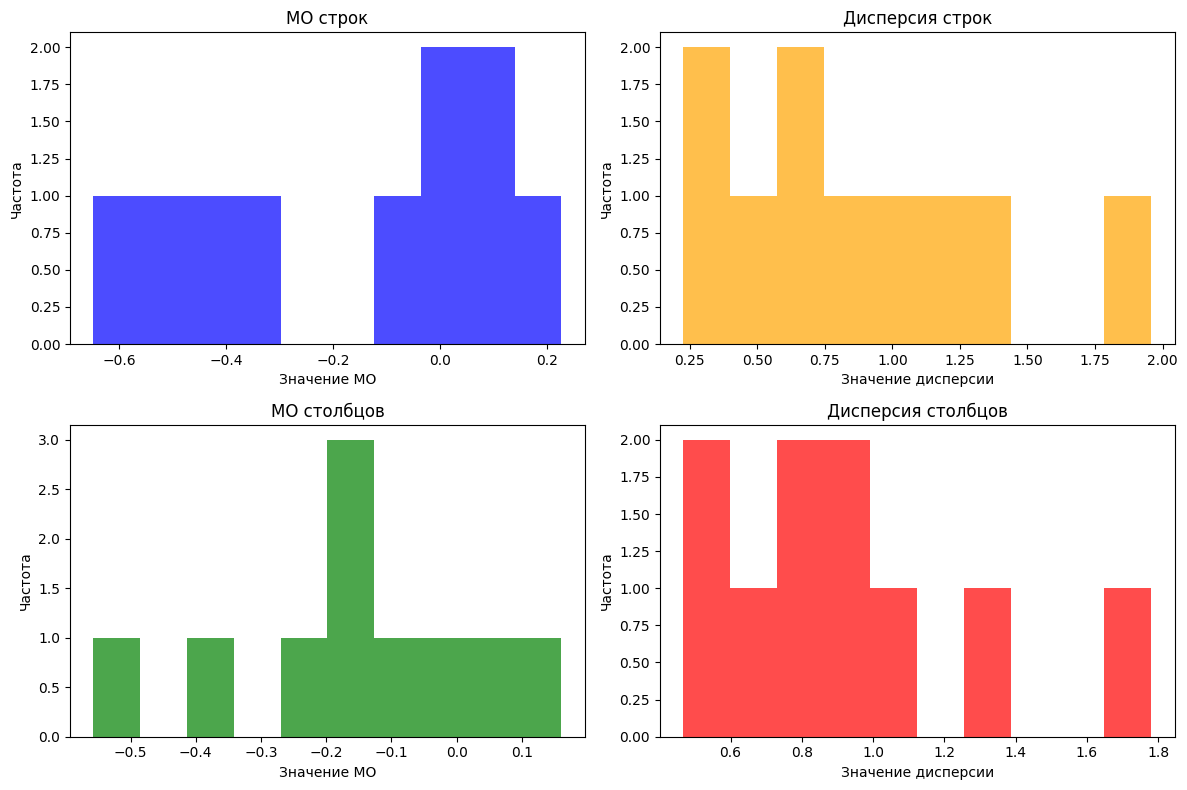

In [ ]:
def AnalyzeMatrix(m, n):
    # Заполняем матрицу случайными числами с нормальным распределением
    matrix = np.random.normal(loc=0, scale=1, size=(m, n))
    # Вычисляем мат ожидание и дисперсию для строк и столбцов
    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)
    col_means = np.mean(matrix, axis=0)
    col_vars = np.var(matrix, axis=0)

    # Выводим результаты
    #print("МО строк:", row_means)
    #print("Дисперсия строк:", row_vars)
    #print("МО столбцов:", col_means)
    #print("Дисперсия столбцов:", col_vars)

    # Строим гистограммы
    plt.figure(figsize=(12, 8))

    # Гистограммы для строк
    plt.subplot(2, 2, 1)
    plt.hist(row_means, bins=10, color='blue', alpha=0.7)
    plt.title('МО строк')
    plt.xlabel('Значение МО')
    plt.ylabel('Частота')

    plt.subplot(2, 2, 2)
    plt.hist(row_vars, bins=10, color='orange', alpha=0.7)
    plt.title('Дисперсия строк')
    plt.xlabel('Значение дисперсии')
    plt.ylabel('Частота')

    # Гистограммы для столбцов
    plt.subplot(2, 2, 3)
    plt.hist(col_means, bins=10, color='green', alpha=0.7)
    plt.title('МО столбцов')
    plt.xlabel('Значение МО')
    plt.ylabel('Частота')

    plt.subplot(2, 2, 4)
    plt.hist(col_vars, bins=10, color='red', alpha=0.7)
    plt.title('Дисперсия столбцов')
    plt.xlabel('Значение дисперсии')
    plt.ylabel('Частота')

    plt.tight_layout()
    plt.show()

# Тест
AnalyzeMatrix(10, 10)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [ ]:
def chess(m, n, a, b):
    # Создаем матрицу с заданными размерами, заполненную нулями
    mat = [[0] * n for i in range(m)]
    # Заполняем матрицу в шахматном порядке
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                mat[i][j] = a
            else:
                mat[i][j] = b
    return mat

# Тесты
res1 = chess(3, 3, 1, 2)
for i in res1:
    print(i)

res2 = chess(4, 4, 5, 6)
for i in res2:
    print(i)

res3 = chess(2, 5, 10, 20)
for i in res3:
    print(i)

[1, 2, 1]
[2, 1, 2]
[1, 2, 1]
[5, 6, 5, 6]
[6, 5, 6, 5]
[5, 6, 5, 6]
[6, 5, 6, 5]
[10, 20, 10, 20, 10]
[20, 10, 20, 10, 20]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

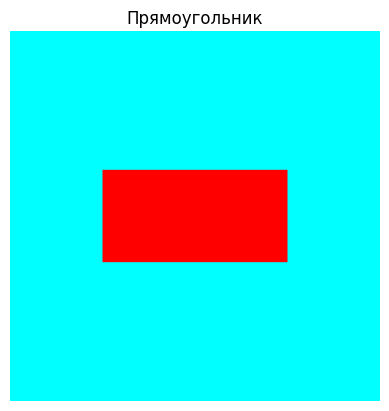

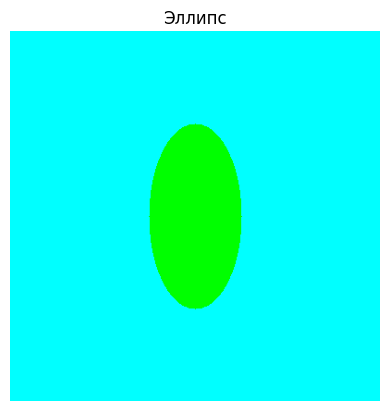

In [ ]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    # Создаем изображение с заданным цветом фона
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:] = background_color
    # Определяем координаты прямоугольника
    x0 = (n - a) // 2
    y0 = (m - b) // 2
    x1 = x0 + a
    y1 = y0 + b
    # Заполняем прямоугольник заданным цветом
    image[y0:y1, x0:x1] = rectangle_color
    return image

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    # Создаем изображение с заданным цветом фона
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:] = background_color
    # Центр эллипса
    x0 = n // 2
    y0 = m // 2
    # Отрисовка эллипса
    for y1 in range(m):
        for x1 in range(n):
            if ((x1 - x0) ** 2) / (a ** 2) + ((y1 - y0) ** 2) / (b ** 2) <= 1:
                image[y1, x1] = ellipse_color

    return image

# Тесты
rec_image = draw_rectangle(200, 100, 400, 400, (255, 0, 0), (0, 255, 255))
plt.imshow(rec_image)
plt.title('Прямоугольник')
plt.axis('off')
plt.show()

ell_image = draw_ellipse(50, 100, 400, 400, (0, 255, 0), (0, 255, 255))
plt.imshow(ell_image)
plt.title('Эллипс')
plt.axis('off')
plt.show()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [ ]:
def AnalyzeTime(data, p):
    # Преобразуем данные в numpy массив
    data = np.array(data)
    # Вычисляем математическое ожидание, дисперсию и СКО
    mean = np.mean(data)
    dvar = np.var(data)
    dstd = np.std(data)
    # Находим локальные максимумы и минимумы
    lmax = (data[1:-1] > data[:-2]) & (data[1:-1] > data[2:])
    lmin = (data[1:-1] < data[:-2]) & (data[1:-1] < data[2:])
    lmaxi = np.where(lmax)[0] + 1  # Смещаем на 1 из-за среза
    lmini = np.where(lmin)[0] + 1
    # Вычисляем скользящее среднее
    rolling_mean = pd.Series(data).rolling(window=p).mean().to_numpy()
    # Возвращаем результаты
    return {
        'Математическое ожидание': mean,
        'Дисперсия': dvar,
        'СКО': dstd,
        'Локальные максимумы': lmaxi,
        'Локальные минимумы': lmini,
        'Скользящее среднее': rolling_mean
    }

# Тест
time_series = [1, 3, 2, 5, 4, 6, 2, 3, 5, 1, 4, 3]
p = 3
results = AnalyzeTime(time_series, p)
print("Математическое ожидание:", results['Математическое ожидание'])
print("Дисперсия:", results['Дисперсия'])
print("СКО:", results['СКО'])
print("Локальные максимумы:", results['Локальные максимумы'])
print("Локальные минимумы:", results['Локальные минимумы'])
print("Скользящее среднее:", results['Скользящее среднее'])

Математическое ожидание: 3.25
Дисперсия: 2.3541666666666665
СКО: 1.5343293866268306
Локальные максимумы: [ 1  3  5  8 10]
Локальные минимумы: [2 4 6 9]
Скользящее среднее: [       nan        nan 2.         3.33333333 3.66666667 5.
 4.         3.66666667 3.33333333 3.         3.33333333 2.66666667]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [ ]:
def OneHot(labels):
    # Преобразуем вектор меток в numpy массив для удобства
    labels = np.array(labels)
    # Определяем количество уникальных классов
    nclasses = np.max(labels) + 1  # Учитываем, что классы могут начинаться с 0
    # Создаем матрицу one-hot кодирования
    one_hot = np.zeros((labels.size, nclasses), dtype=int)
    # Заполняем матрицу
    one_hot[np.arange(labels.size), labels] = 1
    return one_hot
# Тест
labels = [3, 1, 1, 2, 5]
a = OneHot(labels)
print(a)

[[0 0 0 1 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 1]]
